<a href="https://colab.research.google.com/github/Matcap97/OBJECT_DETECTION/blob/main/notebooks/OBJECT_DETECTION_YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INSTALLAZIONE PACCHETTI

In [1]:
!pip install -q torch torchvision ultralytics import-ipynb > /dev/null 2>&1

IMPORT PACCHETTI NECESSARI

In [2]:
from ultralytics import YOLO
import import_ipynb
import os
import kagglehub
from google.colab import drive
import pandas as pd

import cv2
from PIL import Image

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
%cd "drive/MyDrive/OBJECT_DETECTION_YOLOv11"

/content/drive/MyDrive/OBJECT_DETECTION_YOLOv11


IMPORT MODELLO YOLOv11 NANO E SMALL PER TEST

In [6]:
model_n = YOLO("./models/yolo11n.pt")
model_s = YOLO("./models/yolo11s.pt")

In [7]:
print('CLASSI SUPPORTATE:')
model_n.names.values()

CLASSI SUPPORTATE:


dict_values(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

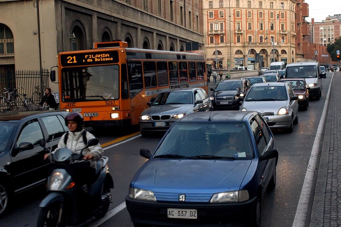

In [17]:
im1 = Image.open("./immagini_test/Bologna.jpg")
new_size = (im1.width // 3, im1.height // 3)
img_resized = im1.resize(new_size)
img_resized

In [18]:
results = model_n.predict(source=im1, name='predict', save=True)


0: 448x640 3 persons, 1 bicycle, 13 cars, 1 motorcycle, 1 bus, 1 truck, 1 traffic light, 167.2ms
Speed: 6.9ms preprocess, 167.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7



0: 448x640 1 person, 3 cars, 2 buss, 1 truck, 164.4ms
Speed: 3.3ms preprocess, 164.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


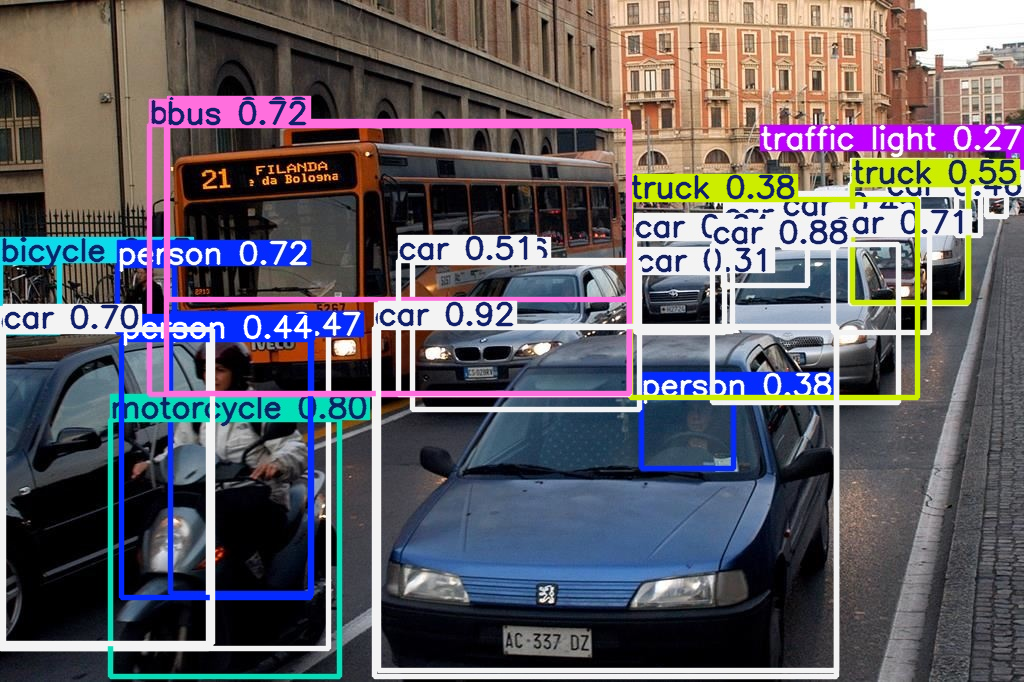

In [44]:
model_n(im1)[0].save(filename="result.jpg")

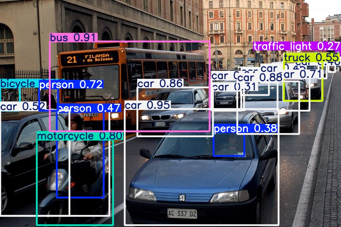

In [35]:
im1 = Image.open(f"./{results[0].save_dir}/Bologna.jpg")
new_size = (im1.width // 3, im1.height // 3)
img_resized = im1.resize(new_size)
img_resized

FINE-TUNING

Durante il training viene applicata una pipeline per la Data augmentation.
Nello specifico vengono applicate le seguenti trasformazioni:
*   hue
*   saturation
*   brightness
*   Translates the image
*   Scales the image
*   Flips the image  
*   Mosaic (Combines four training images into one, simulating different scene compositions and object interactions. Highly effective for complex scene understanding.)
*   Randomly erases a portion of the image during classification training, encouraging the model to focus on less obvious features for recognition
*   Crops the classification image to a fraction of its size to emphasize central features and adapt to object scales, reducing background distractions



In [26]:
(epoche*5)//100

2

In [33]:
epoche=50
model_n = YOLO("./models/yolo11n.pt")
results = model_n.train(data="./license_plate/data.yaml",
                        epochs=epoche,
                        imgsz=640,
                        exist_ok=True,
                        name='train',
                        optimizer='Adam',
                        seed=0,
                        freeze=0,
                        lr0=0.00001,
                        weight_decay=0.0005,
                        cls=0.5, #Weight of the classification loss in the total loss function, affecting the importance of correct class prediction relative to other components.
                        batch=64, #adjust batch size for approximately 60% CUDA memory utilization
                        #val=False, #periodic validation disabled during training but done only at the end of the training
                        patience=(epoche*10)//100  #circa il 10% delle epoche
                        )

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=./models/yolo11n.pt, data=./license_plate/data.yaml, epochs=50, time=None, patience=5, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=0, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning /content/drive/MyDrive/OBJECT_DETECTION_YOLOv11/license_plate/train/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/OBJECT_DETECTION_YOLOv11/license_plate/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=1e-05, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.15G      1.509      4.081      1.362         73        640: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         13         30    0.00103      0.133    0.00116   0.000605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.17G      1.302      4.027      1.379         55        640: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         13         30   0.000769        0.1   0.000881   0.000597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.17G      1.236       3.81      1.436         52        640: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         13         30   0.000769        0.1   0.000998   0.000566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.19G      1.566      4.021      1.419         62        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         13         30   0.000769        0.1   0.000948   0.000628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.19G      1.411      3.982      1.446         55        640: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         13         30   0.000769        0.1   0.000874   0.000586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.17G       1.47      4.003      1.443         62        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         13         30   0.000769        0.1    0.00103   0.000722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.2G      1.291      3.818      1.339         68        640: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         13         30    0.00103      0.133    0.00766    0.00507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.18G      1.236      3.749      1.361         44        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         13         30    0.00154        0.2    0.00291    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.18G      1.267      3.583      1.285         52        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         13         30    0.00154        0.2    0.00449    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.2G      1.132      3.319      1.124         62        640: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         13         30    0.00154        0.2    0.00338    0.00161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.21G       1.15      3.355      1.134         52        640: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         13         30    0.00231        0.3     0.0026    0.00136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.2G      1.278      3.254      1.106         67        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         13         30    0.00296      0.133    0.00464     0.0023


EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 7, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

12 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


                   all         13         30    0.00103      0.133    0.00615    0.00401
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model_n.predict(source=im1, show=True)

dict_values(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

TypeError: 'DetectionModel' object is not subscriptable